In [1]:
from astropy.io import ascii
from astropy.table import Table, Column, MaskedColumn
import sys
import os
import math
# import matplotlib as plt
import os.path
import matplotlib.pyplot as plt
import operator
import numpy as np
from astropy.stats import sigma_clip
from scipy.optimize import curve_fit

from scipy.optimize import leastsq
import astropy.io.fits as fits
import matplotlib.lines as lines

In [2]:
def median_flux(ap_ph):
    ap_ph_med = ap_ph/np.nanmedian(ap_ph)
    return ap_ph_med
def receive_ascii_data(dir_lightcurv):
    col_1='AperturePhot'
    col_2='bmjd'
    col_3='x_com_cen'
    col_4='y_com_cen'
    data = ascii.read(dir_lightcurv)
    ap_phot = data[col_1]
    bmjd = data[col_2]
    xcen=data[col_3]
    ycen=data[col_4]
    ap_phot = median_flux(ap_phot)
#     plt.plot(bmjd,ap_phot,'.',label=part_str)
    return(ap_phot,bmjd,xcen,ycen)

def ap_range(fileseg,whole_or_part):
#     Used to view a certain amount of file segments 
    fileseg=fileseg
    eqn = fileseg*64
    totval = eqn
    if whole_or_part =='Start':
        strt = 0
    elif whole_or_part == 'Part':
        strt = totval-64
    end = totval
    return(strt,end)

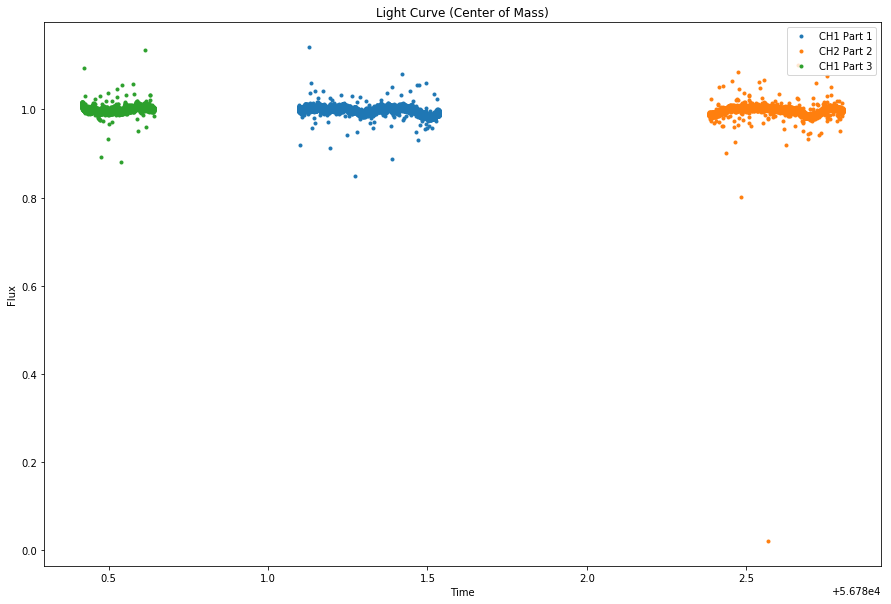

In [53]:
lightcurve_1='/Users/melaniapena/Rsrch/Luhman_16_Research/ap_phot_ascii_com/com_ap_ph_prt1/bcdfits_com_part_1.txt'
lightcurve_2='/Users/melaniapena/Rsrch/Luhman_16_Research/ap_phot_ascii_com/com_ap_ph_prt2/bcdfits_com_part_2.txt'
lightcurve_3='/Users/melaniapena/Rsrch/Luhman_16_Research/ap_phot_ascii_com/com_ap_ph_prt3/bcdfits_com_part_3.txt'
lightcurve_4='/Users/melaniapena/Rsrch/Luhman_16_Research/ap_phot_ascii_com/com_ap_ph_prt4/bcdfits_com_part_4.txt'
# lightcurve_5='/Users/melaniapena/Rsrch/Luhman_16_Research/ap_phot_ascii_com/com_ap_ph_prt5/bcdfits_com_part_5.txt'
# lightcurve_6_1='/Users/melaniapena/Rsrch/Luhman_16_Research/ap_phot_ascii_com/com_ap_ph_prt6-1/bcdfits_com_part_6-1.txt'
# lightcurve_6_2='/Users/melaniapena/Rsrch/Luhman_16_Research/ap_phot_ascii_com/com_ap_ph_prt6-2/bcdfits_com_part_6-2.txt'
# lightcurve_7='/Users/melaniapena/Rsrch/Luhman_16_Research/ap_phot_ascii_com/com_ap_ph_prt7/bcdfits_com_part_7.txt'

ap_ph_1,bmjd_1,x_cen1,y_cen1= receive_ascii_data(lightcurve_1)
ap_ph_2,bmjd_2,x_cen2,y_cen2= receive_ascii_data(lightcurve_2)
ap_ph_3,bmjd_3,x_cen3,y_cen3= receive_ascii_data(lightcurve_3)
ap_ph_4,bmjd_4,x_cen4,y_cen4= receive_ascii_data(lightcurve_4)
# ap_ph_5,bmjd_5,x_cen5,y_cen5= receive_ascii_data(lightcurve_5)
# ap_ph_6_1,bmjd_6_1,x_cen6_1,y_cen6_1= receive_ascii_data(lightcurve_6_1)
# ap_ph_6_2,bmjd_6_2,x_cen6_2,y_cen6_2= receive_ascii_data(lightcurve_6_2)
# ap_ph_7,bmjd_7,x_cen7,y_cen7= receive_ascii_data(lightcurve_7)

plt.figure(figsize=(15,10))
plt.ylabel('Flux')
plt.xlabel('Time')
plt.title('Light Curve (Center of Mass)')
plt.plot(bmjd_1,ap_ph_1,'.',label='CH1 Part 1')
plt.plot(bmjd_2,ap_ph_2,'.',label='CH2 Part 2')
plt.plot(bmjd_3,ap_ph_3,'.',label='CH1 Part 3')
plt.plot(bmjd_4,ap_ph_4,'.',label='CH2 Part 4')
# plt.plot(bmjd_5,ap_ph_5,'.',label='CH2 Part 5')
# plt.plot(bmjd_6_1,ap_ph_6_1,'.',label='CH1 Part 6-1')
# plt.plot(bmjd_6_2,ap_ph_6_2,'.',label='CH1 Part 6-2')
# plt.plot(bmjd_7,ap_ph_7,'.',label='CH1 Part 7')
# # -----------------------------------------------------------
plt.legend(loc='upper right')

In [54]:
def clip_of_mask_flux(clip_flux):
    clip = sigma_clip(clip_flux, sigma=sigma_num, sigma_lower=None, sigma_upper=None, iters=5, cenfunc=np.ma.median, stdfunc=np.std, axis=None, copy=True)
    clipped = clip[np.logical_not(clip.mask)] - 1.
    return clipped

def clip_of_mask (clp_med_flux, x):
    clip = sigma_clip(clp_med_flux, sigma=sigma_num, sigma_lower=None, sigma_upper=None, iters=5, cenfunc=np.ma.median, stdfunc=np.std, axis=None, copy=True)
    clipped_x = x[np.logical_not(clip.mask)]
    return clipped_x    

In [56]:
def clip_arr(data,time,sigma_num,label_nme,colorpnts):
#     Calls previous definition functions and plots them
#     This is to make the code more neater.
    clip_flux = clip_of_mask_flux(data)
    clip_time = clip_of_mask(data,time)
#     plt.plot(clip_time,clip_flux,'.',label=label_nme,color=colorpnts,)
    return clip_flux,clip_time

##c_f:clipped flux of original aperture photometry array
##c_h:clipped time of the flux

sigma_num=5

# plt.figure(figsize=(15,10))
# plt.ylabel('Flux')
# plt.xlabel('Time')
# plt.title('Light Curve (Center of Mass)')

## Clips or masks the data within the array.
##  for both channel 1 and channel 2
c_f1,c_h1 = clip_arr(ap_ph_1,bmjd_1,sigma_num,'CH1 Part 1','tab:blue')
c_f2,c_h2 = clip_arr(ap_ph_2,bmjd_2,sigma_num,'CH2 Part 2','tab:orange')
c_f3,c_h3 = clip_arr(ap_ph_3,bmjd_3,sigma_num,'CH1 Part 3','tab:green')
# c_f4,c_h4 = clip_arr(ap_ph_4,bmjd_4,sigma_num,'CH2 Part 4','tab:red')
# c_f5,c_h5 = clip_arr(ap_ph_5,bmjd_5,sigma_num,'CH2 Part 5','tab:purple')
# c_f6_1,c_h6_1 = clip_arr(ap_ph_6_1,bmjd_6_1,sigma_num,'CH1 Part 6-1','tab:brown')
# c_f6_2,c_h6_2 = clip_arr(ap_ph_6_2,bmjd_6_2,sigma_num,'CH1 Part 6-2','tab:pink')
# c_f7,c_h7 = clip_arr(ap_ph_7,bmjd_7,sigma_num,'CH1 Part 7','tab:grey')
# # plt.legend(loc='lower left')

# ## Printing out the length of clipped and whole array
print('Part 1 (Blue):',len(c_f1),len(ap_ph_1))
print('Part 2 (Orange):',len(c_f2),len(ap_ph_2))
print('Part 3 (Green):',len(c_f3),len(ap_ph_3))
# print('Part 4 (Red):',len(c_f4),len(ap_ph_4))
# print('Part 5 (Purple):',len(c_f5),len(ap_ph_5))
# print('Part 6_1 (Brown):',len(c_f6_1),len(ap_ph_6_1))
# print('Part 6_2 (Pink):',len(c_f6_2),len(ap_ph_6_2))
# print('Part 7 (Grey):',len(c_f7),len(ap_ph_7))

# ## plots only Channel 1
# plt.show()
# plt.figure(figsize=(15,10))
# plt.ylabel('Flux')
# plt.xlabel('Time')
# plt.title('CoM Channel 1 Light curve')
# c_f1,c_h1 = clip_arr(ap_ph_1,bmjd_1,sigma_num,'CH1 Part 1','tab:blue')
# c_f3,c_h3 = clip_arr(ap_ph_3,bmjd_3,sigma_num,'CH1 Part 3','tab:green')
# c_f6_1,c_h6_1 = clip_arr(ap_ph_6_1,bmjd_6_1,sigma_num,'CH1 Part 6-1','tab:brown')
# c_f6_2,c_h6_2 = clip_arr(ap_ph_6_2,bmjd_6_2,sigma_num,'CH1 Part 6-2','tab:pink')
# c_f7,c_h7 = clip_arr(ap_ph_7,bmjd_7,sigma_num,'CH1 Part 7','tab:grey')
# plt.legend(loc='upper right')

# ## plots only Channel 2
# plt.show()
# plt.figure(figsize=(15,10))
# plt.ylabel('Flux')
# plt.xlabel('Time')
# plt.title('CoM Channel 2 Light curve')
# c_f2,c_h2 = clip_arr(ap_ph_2,bmjd_2,sigma_num,'CH2 Part 2','tab:orange')
# c_f4,c_h4 = clip_arr(ap_ph_4,bmjd_4,sigma_num,'CH2 Part 4','tab:red')
# c_f5,c_h5 = clip_arr(ap_ph_5,bmjd_5,sigma_num,'CH2 Part 5','tab:purple')
# plt.legend(loc='upper right')

Part 1 (Blue): 18556 18585
Part 2 (Orange): 17606 17640
Part 3 (Green): 9427 9450


In [57]:
def bin_funct(data_arr,nbin):
    data= data_arr.data
    bins=len(data)
    binned_data = [np.mean(data[i*nbin:i*nbin+nbin]) for i in range(1,bins//nbin+1)]
    return binned_data

In [58]:
# # data = c_f1.data
nbin_num = 10

# # bins = len(data) //next this and the next lines of code are found within the def function create above.
# # binned_data = [np.mean(data[i*nbin:i*nbin+nbin]) for i in range(1,bins//nbin+1)]
nbin_num = 10
bin_f1 = bin_funct(c_f1,nbin_num)
bin_h1 = bin_funct(c_h1,nbin_num)
# bin_f2 = bin_funct(c_f2,nbin_num)
# bin_h2 = bin_funct(c_h2,nbin_num)
# bin_f3 = bin_funct(c_f3,nbin_num)
# bin_h3 =bin_funct(c_h3,nbin_num)
# bin_f4 = bin_funct(c_f4,nbin_num)
# bin_h4 = bin_funct(c_h4,nbin_num)
# bin_f5 = bin_funct(c_f5,nbin_num)
# bin_h5 = bin_funct(c_h5,nbin_num)
# bin_f6_1 = bin_funct(c_f6_1,nbin_num)
# bin_h6_1 = bin_funct(c_h6_1,nbin_num)
# bin_f6_2 = bin_funct(c_f6_2,nbin_num)
# bin_h6_2 = bin_funct(c_h6_2,nbin_num)
# bin_f7 = bin_funct(c_f7,nbin_num)
# bin_h7 = bin_funct(c_h7,nbin_num)

# plt.figure(figsize=(10,5))
# plt.title('Light Curve (Center of Mass)')
# plt.xlabel('time')
# plt.ylabel('flux')

# plt.plot(bin_h1,bin_f1,label='CH1 Part 1',color='tab:blue')
# plt.plot(bin_h2,bin_f2,label='CH2 Part 2',color='tab:orange')
# plt.plot(bin_h3,bin_f3,label='CH1 Part 3',color='tab:green')
# plt.plot(bin_h4,bin_f4,label='CH2 Part 4',color='tab:red')
# plt.plot(bin_h5,bin_f5,label='CH2Part 5',color='tab:purple')
# plt.plot(bin_h6_1,bin_f6_1,label='CH1 Part 6-1',color='brown')
# plt.plot(bin_h6_2,bin_f6_2,label='CH1 Part 6-2',color='pink')
# plt.plot(bin_h7,bin_f7,label='CH1 Part 7',color='Grey')
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# ## plots only Channel 2
# plt.show()
# plt.figure(figsize=(10,5))
# plt.ylabel('Flux')
# plt.xlabel('Time')
# plt.title('CoM Channel 1 Light curve')
# plt.plot(bin_h1,bin_f1,label='Part 1',color='tab:blue')
# plt.plot(bin_h3,bin_f3,label='Part 3',color='tab:green')
# plt.plot(bin_h6_1,bin_f6_1,label='Part 6-1',color='brown')
# plt.plot(bin_h6_2,bin_f6_2,label='Part 6-2',color='pink')
# plt.plot(bin_h7,bin_f7,label='Part 7',color='Grey')

# ## plots only Channel 2
# plt.show()
# plt.figure(figsize=(10,5))
# plt.ylabel('Flux')
# plt.xlabel('Time')
# plt.title('CoM Channel 2 Light curve')
# plt.plot(bin_h2,bin_f2,color='tab:orange')
# plt.plot(bin_h4,bin_f4,color='tab:red')
# plt.plot(bin_h5,bin_f5,color='tab:purple')


In [59]:
def choose_fourier(nmode):
    def fourier_model(x,*fp):
        fourier = fp[1] ##setting the offset first.
#         print(fourier)
        for i in range(nmode):
            n=i+1
            fourier = fourier + fp[2+i*2]*np.cos(2.*np.pi*n*x/fp[0]) + fp[3+i*2]*np.sin(2.*np.pi*n*x/fp[0])
        return(fourier)
    return(fourier_model)

# def choose_fourier1(nmode):
#     def fourier_model(x,*fp):
#         fourier = fp[1] ##setting the offset first.
# #         print(fourier)
#         for i in range(nmode+1):
#             n=i
#             fourier = fourier + fp[2+i*2]*np.cos(2.*np.pi*n*x/fp[0]) + fp[3+i*2]*np.sin(2.*np.pi*n*x/fp[0])
#         return(fourier)
#     return(fourier_model)

def choose_ipsv(maxorder):
    def ipsv_model(xy_arr,*p):
        x=xy_arr[0,:]
        y=xy_arr[1,:]
        x_bar=np.mean(xy_arr[0,:])
        y_bar=np.mean(xy_arr[1,:])
        
        index_ipsv = 1
        ipsv = p[0]
        for i in range(maxorder):
            order=i+1
            loop_order=i+2
            for j in range(loop_order):
                ipsv=ipsv+p[index_ipsv]*(x-x_bar)**(order-j)*(y-y_bar)**(j)
                index_ipsv=index_ipsv+1
#         print(index_ipsv)
        return(ipsv)
    return(ipsv_model)

def choose_f_ipsv(nmodes,maxorder):
    def f_ipsv_model(xyt_arr,*p):
        x=xyt_arr[0,:]
        y=xyt_arr[1,:]
        t=xyt_arr[2,:]
        xy = np.array([x,y])
#       functions to find the number of parameters for each model.
        n_ipsv=1
        for i in range(maxorder):#parameters for ipsv
            n_ipsv=n_ipsv +(i+2) 
            
        n_f = 2+2*(nmodes) #parameters for fourier
#         print(n_f,n_ipsv)
#       splitting up actual parameter ( p ) according to model (ipsv then fourier parameters)
        p_ipsv = p[0:n_ipsv]
        p_f = p[n_ipsv::]
#         print(p)
        ipsv_model = choose_ipsv(maxorder)(xy,*p_ipsv)
        f_model = choose_fourier(nmodes)(t,*p_f)
        model = ipsv_model *f_model
        return(model)
    return(f_ipsv_model)

def organize_data(lightcurve):
    data_num = ascii.read(lightcurve)
    #saves in all data into a table array
    col_1='AperturePhot';col_2='bmjd';col_3='x_com_cen';col_4='y_com_cen'
    ap_ph = data_num[col_1]
    bmjd = data_num[col_2]
    x_cen=data_num[col_3]
    y_cen=data_num[col_4]
    
#     takes the median of the flux
    ap_ph=median_flux(ap_ph)
#     Clips out data points from
#      the lightcurve along with its
#      centroids and time.
    c_f =clip_of_mask(ap_ph,ap_ph)
    c_h = clip_of_mask(ap_ph,bmjd)
    c_cenx = clip_of_mask(ap_ph,x_cen)
    c_ceny = clip_of_mask(ap_ph,y_cen)
    
#     c_fbin = bin_funct(c_f,nbin_num);c_f = c_fbin
#     c_hbin = bin_funct(c_h,nbin_num);c_h = c_hbin
#     c_cenxbin = bin_funct(c_cenx,nbin_num);c_cenx = c_cenxbin
#     c_cenybin = bin_funct(c_ceny,nbin_num);c_ceny = c_cenybin
    arr=np.array([c_f,c_h,c_cenx,c_ceny])
    return(arr)



In [64]:
# -------------------------------------------------------------------------------------------------------------
#choose the mode and order for Fourier and IPSV polynomial
maxorder=2;nmodes=5
# We can choose which part of the light curve we can use.
# dir_samp = '/Users/melaniapena/Rsrch/Luhman_16_Research/ap_phot_ascii_com_sam/com_ap_ph_prt2/bcdfits_part_2.txt'
lightcurve=lightcurve_3
# -------------------------------------------------------------------------------------------------------------
#Taking out the info from the the ASCII directory array.
# This also clips the data and takes the median of the flux array.
data_arr = organize_data(lightcurve)
c_f = data_arr[0]
c_h =data_arr[1]
c_cenx = data_arr[2]
c_ceny = data_arr[3]

# -------------------------------------------------------------------------------------------------------------
### ONLY FOURIER MODEL (ASTROPHYSICAL MODEL)

n_f = 2+2*(nmodes)
print('Parameters for Fourier model: ',n_f) ## number of paramters for number of fourier terms
# guess parameters for fourier
guess_fourier = np.zeros(n_f)
number = 12
period_guess=number/24
offset_guess=1
guess_fourier[0] = period_guess
guess_fourier[1] = offset_guess
# -------------------------------------------------------------------------------------------------------------
### ONLY IPSV MODEL

n_ipsv=1
for i in range(maxorder):
    n_ipsv=n_ipsv +(i+2)
print('Parameters for IPSV model: ',n_ipsv) ## number of parameters for ipsv polynomial

# guess parameters for ipsv
guess_ipsv = np.zeros(n_ipsv)
xy_arr=np.array([c_cenx,c_ceny]) ##centroids in table array for curve fit

# # -------------------------------------------------------------------------------------------------------------
### FULL MODEL (ASTROPHYSICAL AND IPSV MODEL)

# Will be using the same guess parameters from ipsv and fourier
guess_ipsv_f = np.append(guess_ipsv,guess_fourier)
xyt_arr=np.array([c_cenx,c_ceny,c_h]) ### setting time, x centroid , and y centroid into the same table array.
# Using the Curve fit for the model.
full_params, covar = curve_fit(choose_f_ipsv(nmodes,maxorder),xyt_arr,c_f,p0=guess_ipsv_f)
# # -------------------------------------------------------------------------------------------------------------
### Keeping the parameters consistent.

fullp_ipsv = full_params[0:n_ipsv]
fullp_f = full_params[n_ipsv::]

# model_f = choose_fourier(nmodes)(c_h,*fullp_f)
# model_ipsv = choose_ipsv(maxorder)(xy_arr,*fullp_ipsv)
model_final = choose_f_ipsv(nmodes,maxorder)(xyt_arr,*full_params)
# # -------------------------------------------------------------------------------------------------------------


Parameters for Fourier model:  12
Parameters for IPSV model:  6


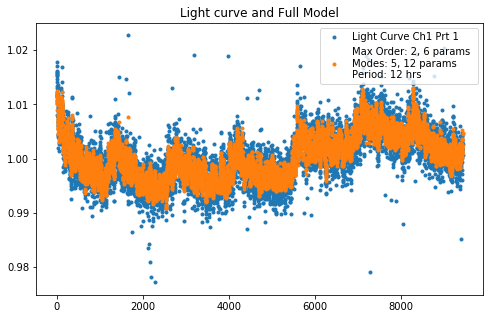

In [65]:
plt.figure(figsize=(8,5))
# plt.xlim([5000,6000])
plt.title('Light curve and Full Model')
plt.plot(c_f,'.',label='Light Curve Ch1 Prt 1')
plt.plot(model_final,'.',label='Max Order: '+str(maxorder)+', '+str(n_ipsv)+' params \nModes: '+str(nmodes)+', '+str(n_f)+' params'+'\nPeriod: '+str(number)+' hrs')
plt.legend(loc='upper right');plt.show()

# plt.plot(c_f,'.',label='light curve')
# plt.plot(model_f,'.',label='nmodes '+str(nmodes)+', '+str(n_f)+' params')
# plt.legend(loc='upper right');plt.show()

# plt.plot(c_f,'.',label='light curve')
# plt.plot(model_ipsv,'.',label='Max order '+str(maxorder)+', '+str(n_ipsv)+' params')
# plt.legend(loc='upper right');plt.show()

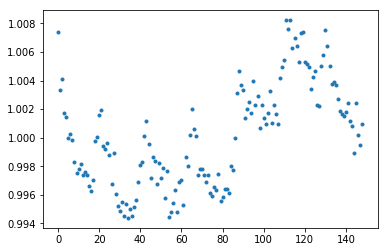

In [66]:
nbin_num = 63
bin_f = bin_funct(c_f,nbin_num)
bin_h = bin_funct(c_h,nbin_num)
len(bin_f)
plt.plot(bin_f,'.')
# plt.plot(c_f,'.')

Std:  0.002304716751041298
Chi_Sqaured: 9487.171293853236
Length of Flux:  9427
Chi-Sqrd/len(Flux):  1.0063828677048092
BIC:  9542.07929


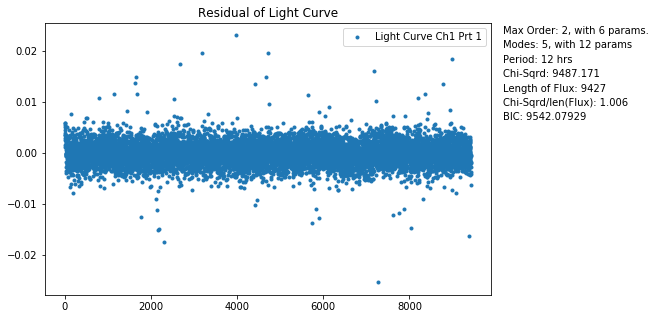

In [67]:
def chi_sqrd(Model, Data, unc):
    two = 2
    chi_squared = sum(((Data - Model) ** two) / unc ** two)
    return chi_squared

# This gives noise from the data
flux_roll = np.roll(c_f,1)
diff = flux_roll - c_f
f_stdev = np.std(diff) / np.sqrt(2)
print('Std: ',f_stdev) ## noise is for each data point 0.2%
chi_2 = chi_sqrd(model_final,c_f,f_stdev)

len_c_f = len(c_f)
chi_val = round(chi_2,3)
chi_div_len_fl = chi_2/(len(c_f))
round_chi_div_len_fl = round(chi_div_len_fl,3)

# The BIC formula:
BIC = round(chi_2 + np.log(len_c_f)*(n_ipsv),5)


plt.figure(figsize=(8,5))
print('Chi_Sqaured:',chi_2)
print('Length of Flux: ',len(c_f))
print('Chi-Sqrd/len(Flux): ',chi_2/(len(c_f)))
print('BIC: ', BIC)

plt.title('Residual of Light Curve')
str1 = 'Max Order: '+str(maxorder)+', with '+str(n_ipsv)+' params.'
str2 = 'Modes: '+str(nmodes)+', with '+str(n_f)+' params'
str3 = 'Period: '+str(number)+' hrs'
str4 = 'Chi-Sqrd: '+ str(chi_val)
str5 = 'Length of Flux: '+ str(len(c_f))
str6 = 'Chi-Sqrd/len(Flux): '+ str(round_chi_div_len_fl)
str7 = 'BIC: ' + str(BIC)
plt.figtext(0.92,0.85,str1)
plt.figtext(0.92,0.81,str2)
plt.figtext(0.92,0.77,str3)
plt.figtext(0.92,0.73,str4)
plt.figtext(0.92,0.69,str5)
plt.figtext(0.92,0.65,str6)
plt.figtext(0.92,0.61,str7)
res = c_f - model_final
plt.plot(res,'.',label='Light Curve Ch1 Prt 1')
plt.legend(loc='upper right');plt.show()

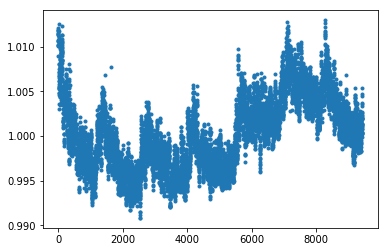

In [68]:
def apPhot_range(fileseg,str_whole_or_part):
#     Used to view a certain amount of file segments 
    fileseg=fileseg
    eqn = fileseg*64
    totval = eqn
    if str_whole_or_part =='Start':
        strt = 0
    elif str_whole_or_part == 'Part':
        strt = totval-64
    end = totval
    return(strt,end)
st,ed = apPhot_range(300,'Start')
plt.plot(model_final[st:ed],'.')